- title: Introduction to Exploring Data in Python 
- tags: python, data, exploratory_data_analysis, visualization
- date: 2018-11-25

# Introduction to Exploring Data in Python

In this lesson, we're going to learn about how to get a feel for data in Python, using basic tools to look at our data.

First, however, let's make sure we have the right version of a library we need called Seaborn.  Run the code in the next block and make sure that you get the right version.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.__version__

'0.9.0'

Make sure that you have version 0.9.0 or higher as the output.  If you don't, the code in this lesson will not work.  

If you have a lower version (you might have 0.8.0) then start a new cell and run the following code: 

`!pip install seaborn --upgrade`

Then, when that finishes installing (the asterisk goes away), *delete that cell* and select *kernel -> restart and run all* from the menus up above.  If everything worked ok, it should now say 0.9.0 or higher.  If not, consult with me.

We're also going to import *Pandas*, which is a very powerful library for reading and accessing tabular data (like spreadsheets); you can think of Pandas as souped-up Excel for programmers.  We will also import the built in *io* library and the *Requests* library for making requests from the internet; we'll see why in a moment. 

In [2]:
import pandas as pd
import io, requests

This next block is a little gnarly.  What we're going to do is use the `get()` function in the requests library to fetch a good learning dataset from another professor's class [this class, if you're curious](http://data.princeton.edu/wws509/datasets/#salary), and then turn it into a Pandas DataFrame (fancy spreadsheet). There's a bit of messiness that you don't quite need to worry about in this---particularly, `read_fwf()` is a pandas function to read from a file of fixed-width lines, and `StringIO` is how Python tricks libraries to think that a string (the result of our http request) is a file. 

For an exercise, go and look up the Pandas documentation for how you'd read a CSV file, then go find a CSV file online and load it up to a Pandas dataset yourself. 

In [3]:
raw_data = requests.get("http://data.princeton.edu/wws509/datasets/salary.dat").text
df = pd.read_fwf(io.StringIO(raw_data))

In [4]:
df.head()

sx    rk  yr         dg  yd     sl
0    male  full  25  doctorate  35  36350
1    male  full  13  doctorate  22  35350
2    male  full  10  doctorate  23  28200
3  female  full   7  doctorate  27  26775
4    male  full  19    masters  30  33696

We just used the `head()` method on our DataFrame, `df`, to see the first few rows of the data.  This is a great way to get a quick look at what the variables are in a dataset, what type they are, and so forth.  

One immediately annoying thing about this dataset is that the variables have terrible names.  Let's fix that. 

In [5]:
df.columns=["sex", "rank", "years_in_rank", "highest_degree", "years_since_degree", "salary"]

In [6]:
df.head()

sex  rank  years_in_rank highest_degree  years_since_degree  salary
0    male  full             25      doctorate                  35   36350
1    male  full             13      doctorate                  22   35350
2    male  full             10      doctorate                  23   28200
3  female  full              7      doctorate                  27   26775
4    male  full             19        masters                  30   33696

We can also learn a lot about a DataFrame by using the `describe()` and `value_counts()` methods.

In [7]:
df.describe()

years_in_rank  years_since_degree        salary
count      52.000000           52.000000     52.000000
mean        7.480769           16.115385  23797.653846
std         5.507536           10.222340   5917.289154
min         0.000000            1.000000  15000.000000
25%         3.000000            6.750000  18246.750000
50%         7.000000           15.500000  23719.000000
75%        11.000000           23.250000  27258.500000
max        25.000000           35.000000  38045.000000

In [8]:
df.sex.value_counts('')

male      38
female    14
Name: sex, dtype: int64

So, obviously, this is a dataset about a theoretical gender discrimination in university employment problem, and one obvious thing we might want to know here is whether there's a gender disparity by rank: are higher ranking faculty in our dataset more likely to be one gender or another?

One classic exploratory tool to get a sense of whether this is true is known as a *crosstab*. Basically, that's just a fancy name for a table---we might want to know how many assistant professors there are of each gender, associate professors, etc. That's pretty easy to do in Pandas.

This kind of table is also known as a *contingency table*.

In [9]:
pd.crosstab(index=df['sex'], columns=df['rank'], margins=True)

rank    assistant  associate  full  All
sex                                    
female          8          2     4   14
male           10         12    16   38
All            18         14    20   52

We can see right away that there is a gender disparity. More than half of women are at the assistant (lowest) rank, while less than a third of men are there; men are more likely to be full professors (the highest rank) than anything else.  Note that this **isn't evidence of discrimination**---after all, there might be some other reason for this disparity (and if this pattern didn't show up, it wouldn't be evidence of no discrimination).  To get serious evidence, we'll have to look at some of the things that we'll talk about in the statistics part of the course.  Nonetheless, it's always good to get a basic look at your data first.

Another great way to understand what your data is all about is to use visualizations.  For this, we'll make use of the Seaborn library that we loaded up right at the beginning of this lesson.

The first visualization tool in our kit is the *histogram*.  This allows us to visualize the *distribution* of a single variable in our data---to see how much of our data takes different kinds of values.  Let's look at a histogram of the salary data in this set. In Seaborn, we do this with the `distplot()` function (for reasons that are a bit obscure---almost every other library calls it "hist").

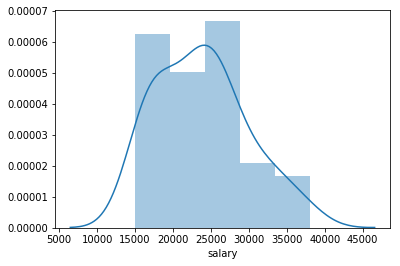

In [10]:
sns.distplot(df["salary"])

This allows us to see the rough shape of our data.  There are a bunch of salaries, it looks like, between 15,000 and 30,000-ish, and many fewer salaries above that.  (Ignore the line drawn through this plot for now, that's a fancy thing called a "kernel density estimate") 

You should always start by looking at histograms of your variables of interest.

One gotcha with histograms is that the *bin size* makes a big difference.  What a histogram does is chunks our data into groupings, each with the same size, and then makes a bar chart of those groups.  Seaborn has an algorithm that by default usually makes a pretty sensible selection, but it's always good to look at different bin widths---it can make a big difference. 

In the existing data, it looks like the default Seaborn algorithm chose 5 bins, which seems sensible, but let's change that and see what happens!

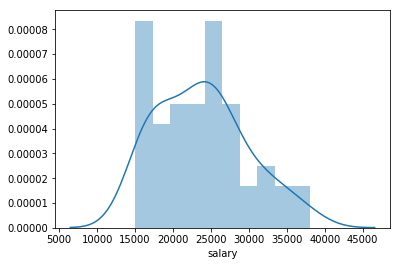

In [11]:
sns.distplot(df["salary"], bins=10)

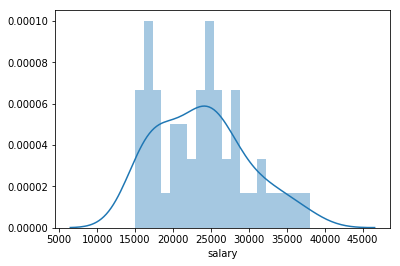

In [12]:
sns.distplot(df["salary"], bins=20)

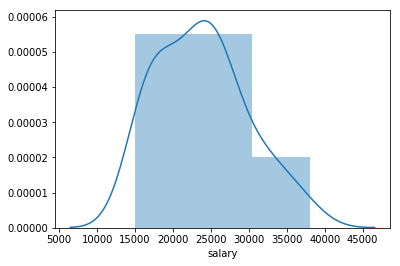

In [13]:
sns.distplot(df["salary"], bins=3)

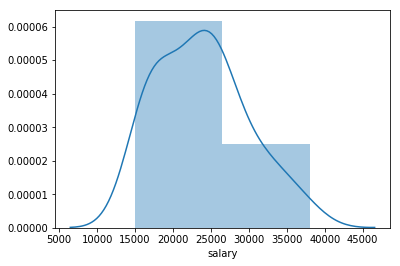

In [14]:
sns.distplot(df["salary"], bins=2)

Depending on how gnarly your dataset is, you might see very different things at different numbers of bins.  So you should look at many.

Another classic standby is the *scatterplot* which is how we get a first look at how two different numerical variables relate to one another.  Let's see how years since degree relate to salary. 

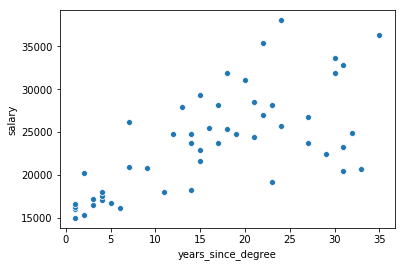

In [15]:
sns.scatterplot(x=df["years_since_degree"], y=df["salary"])

In a scatterplot, each observation is a dot, and the location of a dot is determined by its value on the two variables.  So it looks like on the whole, the further out from degree someone is, the higher their salary is. This is as to be expected---obviously, more experienced people get paid more.  


## Discrete vs Continuous variables

One thing that has been in the background of our lesson thus far is the difference between *categorical* data, also known as *discrete* data, and *numerical* data, also known as "continuous" data.

Discrete data is, loosely speaking, data that takes a fixed number of values in your dataset. For example, in the dataset we're working with, gender only takes female and male, it's a discrete variable. Income, by contrast, is continuous because within its range, it could be anything.  (Of course, strictly speaking, this isn't true, because you can't pay people fractions of a penny, and in our data we only have whole dollars.  But it's close enough---these categories are kind of rough.) You could make salary discrete by putting it in *bins* --- if we created categories like "under 20,000", "20,000-25,000" and so forth, we could *discretize* that data.

This matters because different visualizations are more or less appropriate for different kinds of data.  For example, scatterplots where one of the variables is discrete tend to be pretty useless.  Take a look:

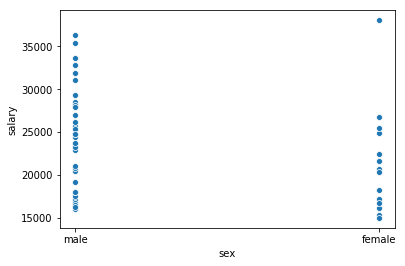

In [16]:
sns.scatterplot(x=df["sex"], y=df["salary"])

That tells us something, but it doesn't tell us a whole lot!  The reason is because there just isn't enough variation in the sex variable to let us see meaningful associations with this plot.  

So what do you do then?  Well, one neat thing we can do is use color to add a categorical dimensions to a scatterplot.  Check this out: 

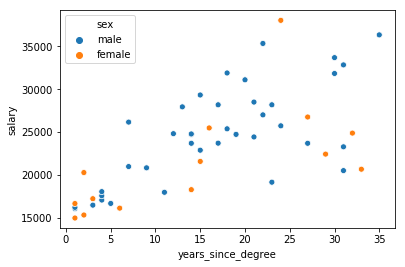

In [17]:
sns.scatterplot(x=df["years_since_degree"], y=df["salary"], hue=df["sex"])

That let us look at each datapoint and see the gender label attached to it!  So we can see, for example, that it sort of looks like women are more or less concentrated below men, that is, that at the same number of years since degree, it sort of looks like women tend to be paid less.  (We'll make "sort of looks like" much more precise when we learn about regression.) 

Another good classic plot to understand how values of a numeric variable differ by a categorical variable is the boxplot: 

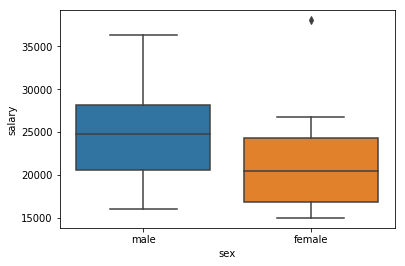

In [18]:
sns.boxplot(x=df["sex"], y=df["salary"])

The way to read a boxplot is that the boxes shows the *interquartile range*, or the middle 50% (i.e., the 25th percentile to the 75th percentile) of the distributions---in this case, of the distributions of salary by gender.  The whiskers (bars) at the ends show the full range of the dataset, except for extreme values ("outliers"), which are shown in dots above and below. The bars in the middle of the boxes represent the mean (average). 

Here, we can see that salaries for women, on the whole, tend to clump lower than men, except for one woman who is getting a much higher salary than everyone else.

The histogram, scatterplot, and boxplot are the Big Three for data visualizations---between the three of them and their variations, you can usually get a pretty good feel for the overall shape of your data, before you drill down and do analysis on them.